In [ ]:
#讀取資料資訊
import pandas as pd
from requests import get
import io
url = 'https://www.motc.gov.tw/uploaddowndoc?file=datagov/1118823766994980864.csv&filedisplay=106-111%E5%B9%B4%E9%81%93%E8%B7%AF%E4%BA%A4%E9%80%9A%E4%BA%8B%E6%95%85%E8%AA%BF%E6%9F%A5%E5%A0%B1%E5%91%8A%E8%A1%A8%E4%B8%80%E8%A1%A8%E4%BA%8C%E5%8F%8A30%E6%97%A5%E6%AD%BB%E4%BA%A1%E6%B8%85%E5%96%AE2.csv&flag=doc'
response = get(url)
data = pd.read_csv(io.StringIO(response.text))
data.info()

In [ ]:
#資料清洗
#將肇事逃逸那欄的「1」變為｢沒有肇逃」，「2」變為｢有肇逃」
data['肇事逃逸'] = data['肇事逃逸'].replace({1: '没有肇逃', 2: '有肇逃'})
print (data['肇事逃逸'].value_counts())
#將sex那欄的「1」變為｢男」，「2」變為｢女」
data['SEX'] = data['SEX'].replace({1: '男', 2: '女'})
#將道路類別、事故類型及型態、飲酒情形、事故位置、主要肇事因素這五欄，也依照對照表進行轉換
data['道路類別'] = data['道路類別'].replace({1: '國道', 2: '省道', 3:'縣道', 4:'鄉道', 5:'市區道路', 6:'村里道路', 7:'專用道路', 8:'其他'})
data['事故類型及型態'] = data['事故類型及型態'].replace({1: '對向通行中', 2: '同向通行中', 3: '穿越道路中', 4: '在路上嬉戲', 5: '在路上作業中', 6: '衝進路中', 7: '從停車後(或中)穿出', 8: '佇立路邊(外)', 9: '其他', 10: '對撞', 11: '對向擦撞', 12: '同向擦撞', 13: '追撞', 14: '倒車撞', 15: '路口交岔撞', 16: '側撞', 17: '其他', 18: '路上翻車、摔倒', 19: '衝出路外', 20: '撞護欄(樁)', 21: '撞號誌、標誌桿', 22: '撞收費亭', 23: '撞交通島', 24: '撞非固定設施', 25: '撞橋樑、建築物', 26: '撞路樹、電桿', 27: '撞動物', 28: '撞工程施工', 29: '其他', 30: '衝過(或撞壞)遮斷器', 31: '正越過平交道中', 32: '暫停位置不當', 33: '在平交道內無法行動', 34: '其他'})
data['飲酒情形'] = data['飲酒情形'].replace({1: '經觀察未飲酒', 2: '經檢測無酒精反應', 3: '經呼氣檢測未超過 0.15 mg/L或血液檢測未超過 0.03%', 4: '經呼氣檢測 0.16~0.25 mg/L或血液檢測 0.031%~0.05%', 5: '經呼氣檢測 0.26~0.40 mg/L或血液檢測 0.051%~0.08%', 6: '經呼氣檢測 0.41~0.55 mg/L或血液檢測 0.081%~0.11%', 7: '經呼氣檢測 0.56~0.80 mg/L或血液檢測 0.111%~0.16%', 8: '經呼氣檢測超過 0.80 mg/L或血液檢測超過 0.16%', 9: '無法檢測', 10: '非駕駛人，未檢測', 11: '不明'})
data['事故位置'] = data['事故位置'].replace({1: '交岔路口內', 2: '交岔口附近', 3: '機車待轉區', 4: '機車停等區', 5: '交通島(含槽化線)', 6: '迴轉道', 7: '快車道', 8: '慢車道', 9: '一般車道(未劃分快慢車道)', 10: '公車專用道', 11: '機車專用道', 12: '機車優先道', 13: '路肩、路緣', 14: '加速車道', 15: '減速車道', 16: '直線匝道', 17: '環道匝道', 18: '行人穿越道', 19: '穿越道附近', 20: '人行道', 21: '收費站附近', 22: '其他'})
data['主要肇事因素'] = data['主要肇事因素'].replace({
    1: '違規超車',
    2: '爭(搶)道行駛',
    3: '蛇行、方向不定',
    4: '逆向行駛',
    5: '未靠右行駛',
    6: '未依規定讓車',
    7: '變換車道或方向不當',
    8: '左轉彎未依規定',
    9: '右轉彎未依規定',
    10: '迴轉未依規定',
    11: '橫越道路不慎',
    12: '倒車未依規定',
    13: '超速失控',
    14: '未依規定減速',
    15: '搶越行人穿越道',
    16: '未保持行車安全距離',
    17: '未保持行車安全間隔',
    18: '停車操作時，未注意其他車 (人)安全',
    19: '起步未注意其他車(人)安全',
    20: '吸食違禁物後駕駛失控',
    21: '酒醉(後)駕駛失控',
    22: '疲勞(患病)駕駛失控',
    23: '未注意車前狀態',
    24: '搶(闖)越平交道',
    25: '違反號誌管制或指揮',
    26: '違反特定標誌(線)禁制',
    27: '未依規定使用燈光',
    28: '暗處停車無燈光、標識',
    29: '夜間行駛無燈光設備',
    30: '裝載貨物不穩妥',
    31: '載貨超重而失控',
    32: '超載人員而失控',
    33: '貨物超長、寬、高而肇事',
    34: '裝卸貨不當',
    35: '裝載未盡安全措施',
    36: '未待乘客安全上下開車',
    37: '其他裝載不當肇事',
    38: '違規停車或暫停不當而肇事',
    39: '拋錨未採安全措施',
    40: '開啟車門不當而肇事',
    41: '使用手持行動電話失控',
    42: '其他引起事故之違規或不當行為',
    43: '不明原因肇事',
    44: '尚未發現肇事因素',
    45: '煞車失靈',
    46: '方向操縱系統故障',
    47: '燈光系統故障',
    48: '車輪脫落或輪胎爆裂',
    49: '車輛零件脫落',
    50: '其他引起事故之故障',
    51: '未依規定行走行人穿越道、地下道、天橋而穿越道路',
    52: '未依標誌、標線、號誌或手勢指揮穿越道路',
    53: '穿越道路未注意左右來車',
    54: '在道路上嬉戲或奔走不定',
    55: '未待車輛停妥而上下車',
    56: '上下車輛未注意安全',
    57: '頭手伸出車外而肇事',
    58: '乘坐不當而跌落',
    59: '在路上工作未設適當標識',
    60: '其他引起事故之疏失或行為',
    61: '路況危險無安全(警告)設施',
    62: '交通管制設施失靈或損毀',
    63: '交通指揮不當',
    64: '平交道看守疏失或未放柵欄',
    65: '其他交通管制不當',
    66: '動物竄出',
    67: '尚未發現肇事因素'
})
print (data)

--2023-11-30 02:06:55--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.1.102, 142.250.1.113, 142.250.1.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.1.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/in0h8usj99qoarophrmd4prpk8red0to/1701309975000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=0903001e-98ac-4dcb-88fb-5673bb1b22ea [following]
--2023-11-30 02:06:55--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/in0h8usj99qoarophrmd4prpk8red0to/1701309975000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=0903001e-98ac-4dcb-88fb-5673bb1b22ea
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to doc-0k-9o-

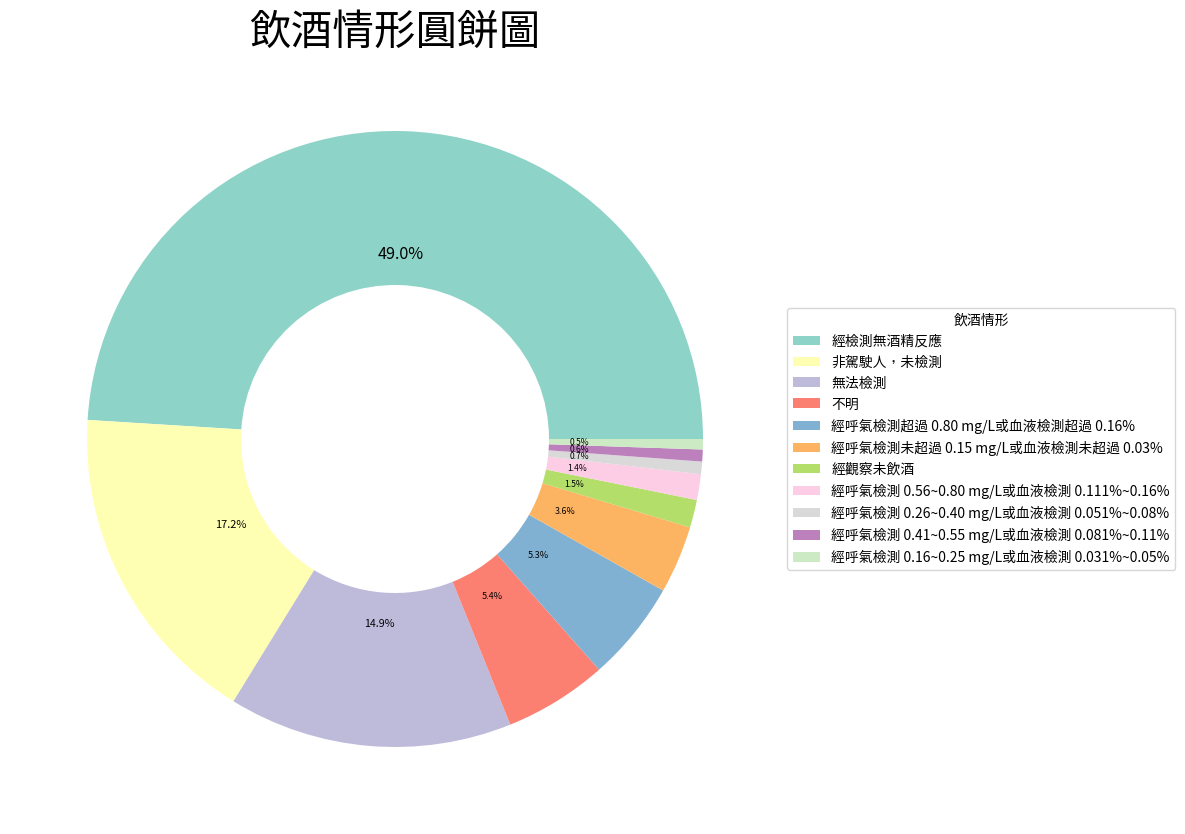

In [12]:
#畫飲酒情形圓餅圖
#安裝並匯入matplotlib的延伸模組
!pip install brewer2mpl
import brewer2mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
#引用台北黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
#使用brewer2mpl的colormaps來改善死亡配色
bmap = brewer2mpl.get_map('Set3', 'qualitative', 11)
colors = bmap.mpl_colors

fig, ax = plt.subplots(figsize=(20, 10))

drink = data['飲酒情形'].value_counts()
wedges, colors, autopct = ax.pie(drink, colors=colors, autopct='%.1f%%', wedgeprops=dict(width=0.5))
# 讓labels不要黏在一起
for autotext, pct in zip(autopct, drink):
    autotext.set_fontsize(6 + 0.1 * pct / 150)
#製作圖例
ax.legend(drink.index, title='飲酒情形',  loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("飲酒情形圓餅圖", fontsize=30, loc="center")

plt.show()

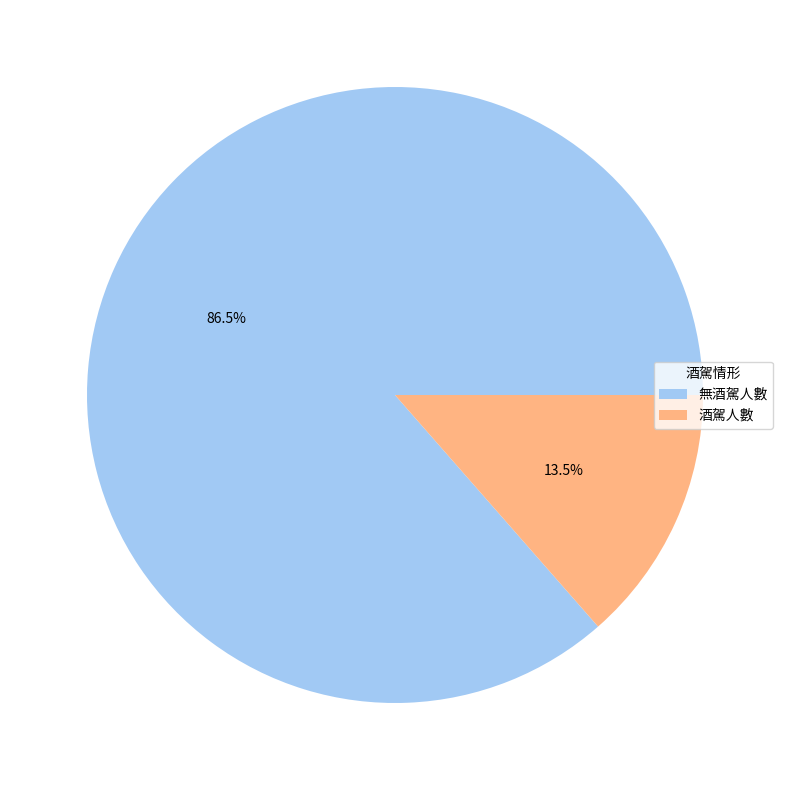

In [13]:
import seaborn as sns
data_dd = [drink[0]+drink[5]+drink[6], drink[4]+drink[7]+drink[8]+drink[9]+drink[10]]
dd_index = ['無酒駕人數', '酒駕人數']
colors = sns.color_palette("pastel")
plt.subplots(figsize=(20, 10))
plt.pie(data_dd, colors=colors, autopct='%.1f%%')
plt.legend(dd_index, title='酒駕情形',  loc='center right', bbox_to_anchor=(1.0, 0.5))
plt.show()

24 小時內死亡    10251
受傷           4309
2-30日內死亡     2303
未受傷           210
不明             28
Name: 受傷程度, dtype: int64


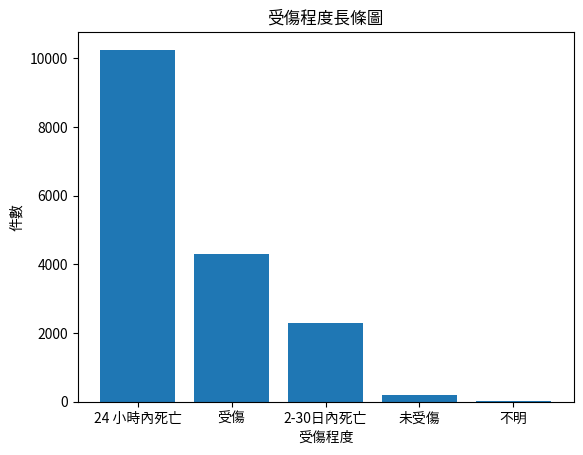

In [14]:
#畫受傷程度長條圖
data['受傷程度'] = data['受傷程度'].replace({1: '24 小時內死亡', 2: '受傷', 3:'未受傷', 4:'不明', 5:'2-30日內死亡'})
hurt = data['受傷程度'].value_counts()
print (data['受傷程度'].value_counts())
plt.bar (hurt.index, hurt)
plt.title ('受傷程度長條圖')
plt.xlabel ('受傷程度')
plt.ylabel ('件數')
plt.show()

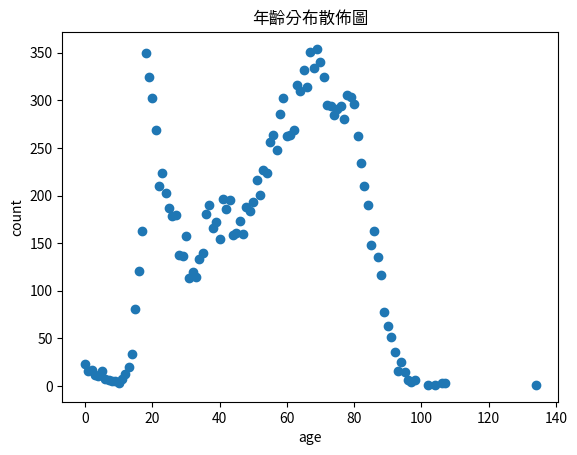

In [15]:
#畫年齡分布散佈圖
age = data['age'].value_counts().sort_index(ascending=True)  #按照年齡降冪排序
plt.scatter (age.index, age)
plt.xlabel('age')
plt.ylabel('count')
plt.title ('年齡分布散佈圖')
plt.show()

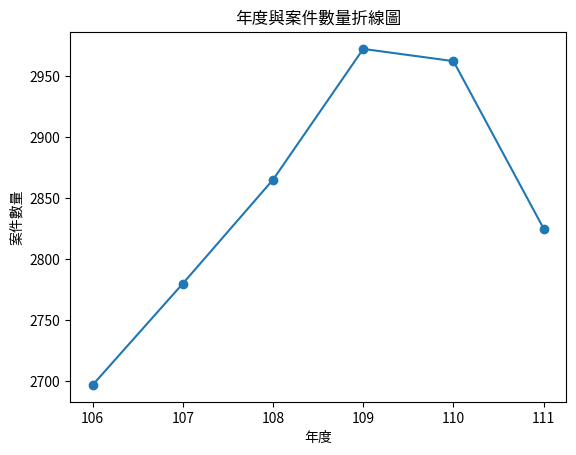

In [16]:
data_year = data['年度'].value_counts().sort_index(ascending=True)
plt.plot (data_year, marker = 'o')
plt.title ('年度與案件數量折線圖')
plt.xlabel ('年度')
plt.ylabel ('案件數量')
plt.show()

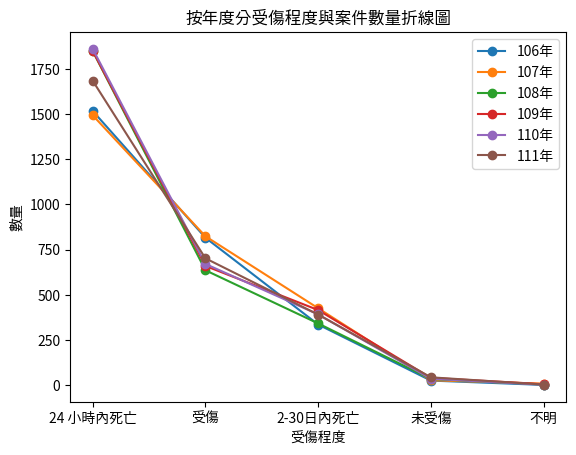

In [17]:
data['受傷程度'] = data['受傷程度'].replace({1: '24 小時內死亡', 2: '受傷', 3:'未受傷', 4:'不明', 5:'2-30日內死亡'})

data_106 = data[(data['年度'] == 106)]
data_107 = data[(data['年度'] == 107)]
data_108 = data[(data['年度'] == 108)]
data_109 = data[(data['年度'] == 109)]
data_110 = data[(data['年度'] == 110)]
data_111 = data[(data['年度'] == 111)]


plt.plot (data_106['受傷程度'].value_counts().index, data_106['受傷程度'].value_counts(), marker = 'o')
plt.plot (data_107['受傷程度'].value_counts().index, data_107['受傷程度'].value_counts(), marker = 'o')
plt.plot (data_108['受傷程度'].value_counts().index, data_108['受傷程度'].value_counts(), marker = 'o')
plt.plot (data_109['受傷程度'].value_counts().index, data_109['受傷程度'].value_counts(), marker = 'o')
plt.plot (data_110['受傷程度'].value_counts().index, data_110['受傷程度'].value_counts(), marker = 'o')
plt.plot (data_111['受傷程度'].value_counts().index, data_111['受傷程度'].value_counts(), marker = 'o')
plt.title ('按年度分受傷程度與案件數量折線圖')
plt.xlabel ('受傷程度')
plt.ylabel ('數量')
plt.legend (['106年', '107年', '108年', '109年', '110年', '111年'])
plt.show()